*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Tomás Banduc & Cristóbal Godoy

# Grupo 2  - Allen A. Isidora M. Iñaki R.

Entrega presencial : 7 de mayo 2025
Entrega final : 28 de mayo 2025

# **Laboratorio 4 - Elasticidad Lineal**

**Objetivo General:** Resolver problemas elípticos multidimensionales mediante el método de Elementos Finitos.

**Objetivo Particular:** A través de FEniCSx, se estudiará la resolución con Elementos Finitos de un sistema de elasticidad lineal bajo régimen de estrés plano en un modelo de elastografía cuasi-estática (QSUE).

## **Introducción**

Existe una gran variedad de enfermedades asociadas a cambios anormales en las propiedades mecánicas de ciertos tejidos del organismo, tales como el cáncer, la cirrosis hepática o el hígado graso. Es por ello que la obtención de información de las cualidades elásticas del tejido biológico resulta de particular interés para la realización de diagnósticos acertados. Esto ha llevado al desarrollo de métodos de reconstrucción de parámetros que codifiquen la elasticidad de secciones del organismo mediante observaciones simples, como imágenes.<br>
<br>
La elastografía es una técnica de imagenología que busca capturar parámetros informativos de elasticidad del tejido mediante su respuesta a perturbaciones mecánicas. Dentro de la diversidad de modalidades existentes, que abarca diferentes tipos de adquisición de imágenes y formas de aplicación de estrés mecánico, se encuentra la elastografía cuasi-estática por ultrasonida (QSUE). Una aplicación de gran importancia de la QSUE es la identificación de tumores cancerosos, donde la tasa de deformación entre una zona sospechosa y una región de referencia es un indicador sencillo de comparación.

## **Ecuaciones de Elasticidad Lineal**
Considerando pequeños desplazamientos y deformaciones de un material sólido e isotrópico $\Omega\subseteq \mathbb{R}^3$ sometido a un esfuerzo mecánico, se tiene por Ley de Hooke: <br>
<br>
\begin{align*}
    \sigma = 2\mu e(\mathbf{u}) + \lambda tr(e(\mathbf{u}))I,
\end{align*} <br>

donde $\mathbf{u}:\Omega\to\mathbb{R}^3$ denota el campo de desplazamiento del cuerpo, $e(\mathbf{u}):=\dfrac{1}{2}\left(\nabla \mathbf{u}+ (\nabla \mathbf{u})^T\right)$ su deformación simetrizada y $\sigma$ la tensión mecánica presente por la acción compresiva o expansiva del material. $\mu$ y $\lambda$ son los parámetros de Lamé del modelo, y satisfacen $\mu>0$, $2\mu + 3\lambda > 0$.<br>

<br>Imponiendo un régimen estacionario, se obtiene el sistema:<br>
<br>
\begin{align*}
(L)\quad-\nabla\cdot ( 2\mu e(\mathbf{u}) + \lambda tr(e(\mathbf{u}))I)= 0\quad\text{ en }\Omega
\end{align*}

<br> Para el modelo de QSUE, se considera un dominio de caja $\Omega$ con base fija, deformado superiormente por la acción de un elastógrafo, obteniéndose el siguiente problema de frontera:<br>
<br>
\begin{align*}
(E)\quad
\begin{cases}-\nabla\cdot ( 2\mu e(\mathbf{u}) + \lambda tr(e(\mathbf{u}))I)= 0\quad&\text{ en }\Omega,\\
\mathbf{u} = \mathbf{d} &\text{ en }\partial\Omega_D^t,\\
\mathbf{u} = \mathbf{0} &\text{ en }\partial\Omega_D^b,\\
\sigma(\mathbf{u})\cdot \mathbf{n} = 0 &\text{ en }\partial\Omega_N,
\end{cases}
\end{align*}<br>
donde $\partial\Omega_D^t$, $\partial\Omega_D^b$ corresponden, respectivamente, con la cara superior e inferior del dominio, y $\partial\Omega_N$ con sus facetas laterales.

## **Régimen de Estrés Plano en Tejido Biológico**

Pese a que la direccionalidad del desplazamiento de los tejidos biológicos es tridimensional, los campos de la QSUE son obtenidos de secuencias de imágenes dos-dimensionales del cuerpo en deformación. Además, en tejido biológico se cumple que $\lambda \gg \mu$. Así, es posible reducir el modelo de elasticidad lineal de la QSUE suponiendo que la región de interés se encuentra libre de estrés en una dirección:<br>
<br>
\begin{align*}
(E)\quad
\begin{cases}-\left(\nabla\cdot(\mu e(\mathbf{u}))+\nabla(\mu\nabla\cdot \mathbf{u})\right)= 0\quad&\text{ en }\Omega,\\
\mathbf{u} = \mathbf{d} &\text{ en }\partial\Omega_D^t,\\
\mathbf{u} = \mathbf{0} &\text{ en }\partial\Omega_D^b,\\
\sigma(\mathbf{u})\cdot \mathbf{n} = 0 &\text{ en }\partial\Omega_N,
\end{cases}
\end{align*}<br>
con $\mathbf{u}$ campo de desplazamiento en un plano de imagen $\Omega$. <br>
<br>

### Formulación Débil
La formulación débil asociada el problema anterior corresponde con encontrar $\mathbf{u}\in U$ tal que:

\begin{align*}
\displaystyle\int\limits_\Omega\mu\left(e(\mathbf{u}):e(\mathbf{v}) + (\nabla\cdot u)(\nabla\cdot v)\right)=0 \quad\forall \mathbf{v}\in V,
\end{align*}<br>
donde <br>
\begin{align*}U:=\left\{\mathbf{u} \in L^2(\Omega,\mathbb{R}^2):\nabla \mathbf{u} \in L^2(\Omega, \mathbb{R}^{2\times 2}), \mathbf{u} = \mathbf{d}\text{ en } \partial\Omega_D^t, \mathbf{u} = \mathbf{0}\text{ en } \partial\Omega_D^b\right\}\end{align*}<br>
\begin{align*}
V:=\left\{\mathbf{v} \in L^2(\Omega,\mathbb{R}^2):\nabla \mathbf{v} \in L^2(\Omega, \mathbb{R}^{2\times 2}), v = 0\text{ en }\partial\Omega_D^t\cup\partial\Omega_D^b\right\}
\end{align*}

In [1]:
# importar gmsh

try:
    import gmsh
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

--2025-05-30 15:13:43--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3497 (3.4K) [application/x-sh]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   3.42K  --.-KB/s    in 0s      

2025-05-30 15:13:44 (33.1 MB/s) - ‘/tmp/gmsh-install.sh’ saved [3497/3497]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/e725f9ac/releases/h5py-install.sh
+ [[ https://gith

In [2]:
# importar dolfinx

try:
    import dolfinx
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenicsx-install-release-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
    import dolfinx

--2025-05-30 15:15:03--  https://fem-on-colab.github.io/releases/fenicsx-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4339 (4.2K) [application/x-sh]
Saving to: ‘/tmp/fenicsx-install.sh’

/tmp/fenicsx-instal 100%[===================>]   4.24K  --.-KB/s    in 0s      

2025-05-30 15:15:03 (43.8 MB/s) - ‘/tmp/fenicsx-install.sh’ saved [4339/4339]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICSX_INSTALLED=/usr/local/share/fem-on-colab/fenicsx.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenicsx.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/a51d633e/release

In [3]:
# instalar e importar pyvista

!pip install pyvista
import pyvista as pv

In [4]:
!pip install PyVirtualDisplay

In [5]:
import pyvista as pv
from pyvirtualdisplay import Display
from dolfinx.plot import vtk_mesh

display = Display(visible=0, size=(600, 400))
display.start()

pv.OFF_SCREEN=False
pv.set_jupyter_backend("static")
pv.plotting.close_all()

True

In [6]:
# gmsh
import gmsh

# ufl
import ufl

# MPI
from mpi4py import MPI

# dolfinx
import dolfinx.fem.petsc
from dolfinx.io import XDMFFile, distribute_entity_data, gmshio
from dolfinx import io, cpp, fem, mesh, plot

# PETSc
from petsc4py import PETSc
from petsc4py.PETSc import ScalarType, Mat

# SLEPc
from slepc4py import SLEPc

# numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt
from matplotlib import cm

# time
import time

## **Parte I**

Considere el problema de elastografía bajo régimen de estrés plano sobre un dominio rectangular de dimensiones $60[mm]\times 40[mm]$, donde se encuentra inmersa en su centro una inclusión circular de radio $r=5[mm]$. En esta sección, resolveremos el campo de desplazamiento para una compresión uniforme de $0.8[mm]$ (ver Figura 1), con $\mu=9[kPa]$ en el fondo y $\mu=4[kPa]$ para la inclusión.

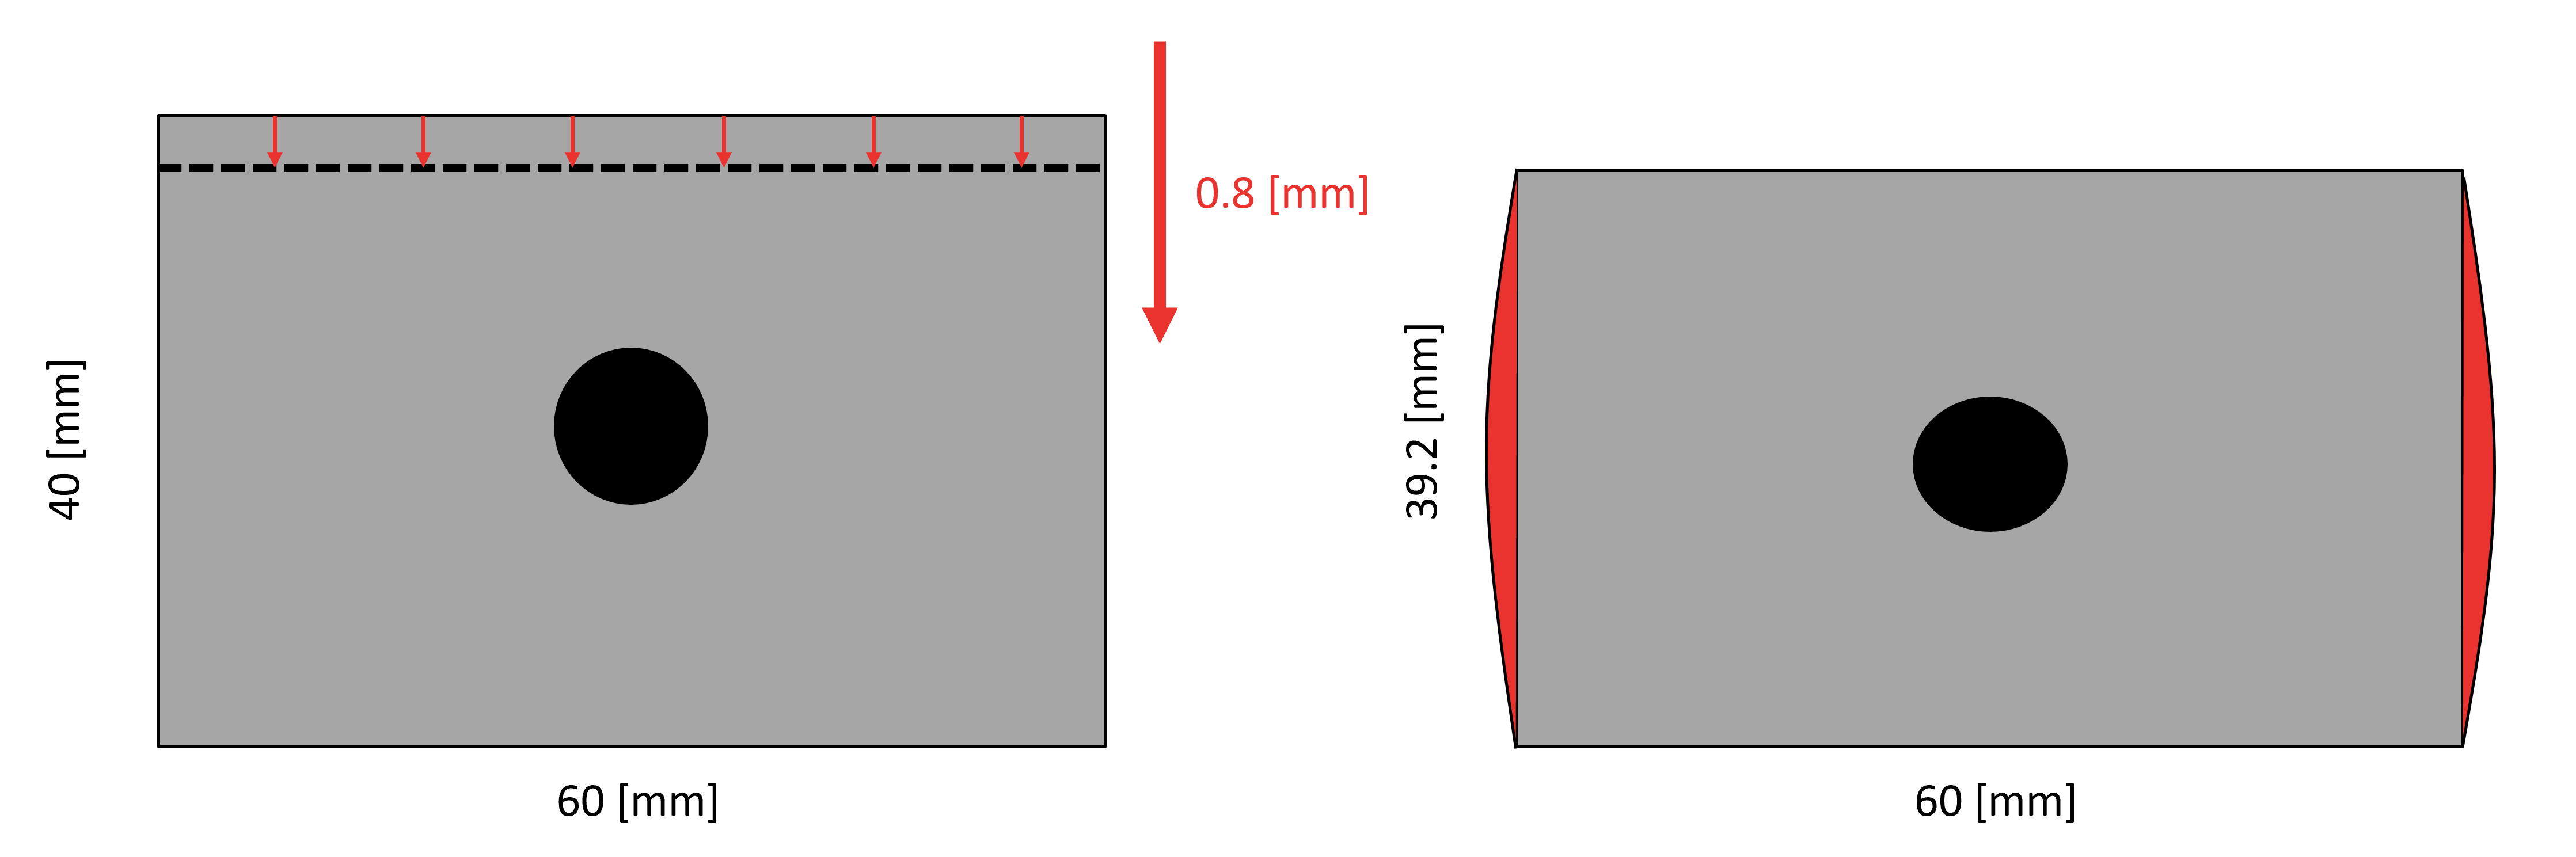

**Figura 1** : Esquema de compresión para modelo de elastografía con inclusión circular.

### **P1**
> **a.** Programe con ``dolfinx`` una función ``rectangular_domain(nx, ny, Lx, Ly)``, que genere un mallado triangular de un rectángulo de ``Lx`` $\times$ ``Ly`` con  ``nx`` celdas en el eje horizontal y ``ny`` celdas en la dirección vertical.


**Indicación:** Grafique el mallado resultante para ``(nx,ny)=(60,40)``.

**Hint:** Busque la función adecuada en ``dolfinx.mesh``.


In [7]:
# comm
comm = MPI.COMM_WORLD

In [8]:
def rectangular_domain(nx:int, ny:int, Lx:float, Ly:float) -> dolfinx.mesh.Mesh:

  # rectangle = ...
  #comm = MPI.COMM_WORLD
  # ,ell_type=mesh.CellType.triangle
  rectangle = mesh.create_rectangle(comm = comm, points = [(0,0),(Lx,Ly)], n = [nx,ny])

  return rectangle

In [9]:
# Datos :
# largo y ancho
Lx, Ly =  60, 40

# radio inclusión
r = 5

# Celdas en dirección x e celdas en dirección y
nx, ny = 60, 40

# compresion
compresion = 0.8

# Dominio :
domain = rectangular_domain(nx, ny, Lx, Ly)

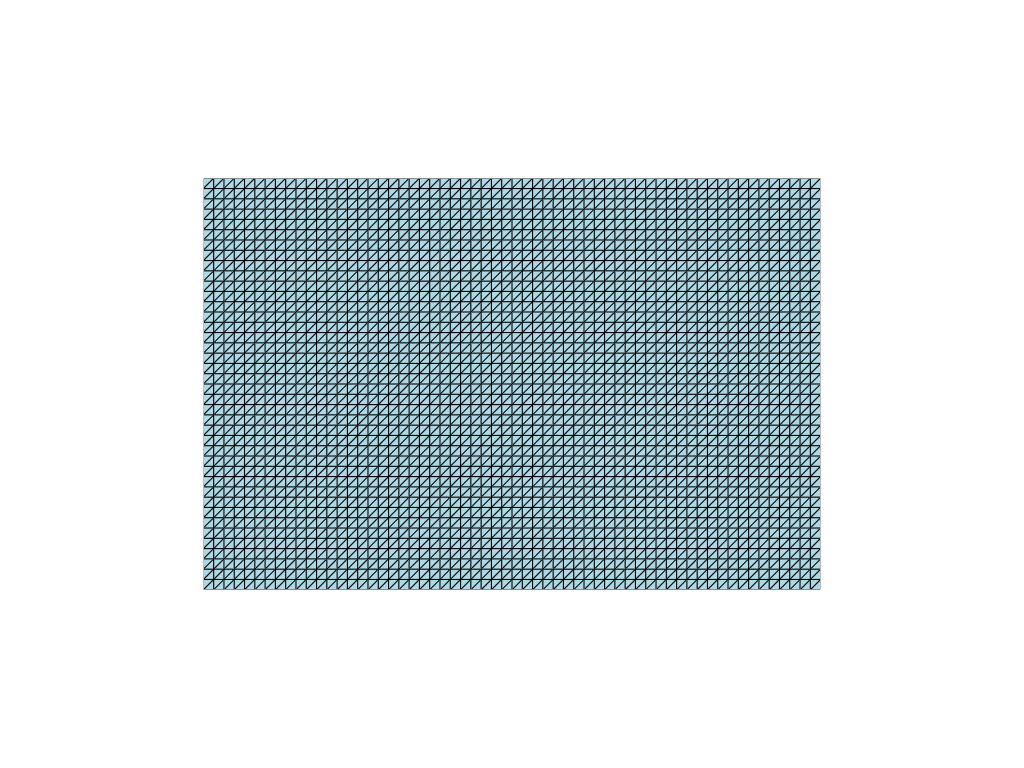

In [10]:
# Ayuda con ChatGPT

import pyvista as pv
import matplotlib.pyplot as plt
from dolfinx.plot import vtk_mesh

# 1. Obtener los componentes VTK desde el dominio de Dolfinx
cells, cell_types, points = vtk_mesh(domain)

# 2. Crear una malla no estructurada de PyVista con los datos
mesh = pv.UnstructuredGrid(cells, cell_types, points)

# 3. Configurar el graficador (PyVista Plotter) con una sola ventana
plotter = pv.Plotter(shape=(1, 1), notebook=True)

# 4. Seleccionar el primer y único subplot (fila 0, columna 0)
plotter.subplot(0, 0)

# 5. Añadir la malla al subplot con estilo de visualización personalizado
plotter.add_mesh(
    mesh,
    cmap="rainbow",            # Mapa de colores tipo arco iris
    lighting=False,            # Sin sombreado 3D
    show_edges=True,           # Mostrar los bordes de los elementos
    show_scalar_bar=True       # Mostrar barra de colores
)

# 6. Ajustar la vista al plano XY (vista "desde arriba")
plotter.view_xy()

# 7. Mostrar la visualización embebida en el notebook
plotter.show()


La presencia de inclusiones con distinta dureza que el medio de referencia hace que el valor de $\mu$ sea heterogéneo en el dominio.

> **b.** Implemente una función `create_mu(inclusions, background, Vspace)`, que reciba un arreglo con las descripciones de las regiones asociadas a una colección de inclusiones con su valor $\mu$ respectivo, el valor del módulo de elasticidad transversal en el medio de referencia y un espacio de elementos finitos, y retorne un objeto `fem.function.Function` con los valores de la función $\mu$ sobre la totalidad del dominio para dicho espacio.


**Indicación:** Grafique el $\mu$ resultante sobre el dominio discreto para la configuración dada del modelo. Utilice una resolución ``(nx,ny)`` y un espacio de funciones ``V`` adecuados para el problema.

**Indicación:** ``inclusions`` debe ser un arreglo donde cada componente sea de la forma ``(f,val)``, describiendo una región de inclusión dada por una inecuación del tipo ``f(x)<=0``, con módulo de elasticidad ``val``.

In [11]:
def create_mu(inclusions:np.ndarray, background:float, Vspace:dolfinx.fem.function.FunctionSpace) -> dolfinx.fem.function.Function:

  # inclusions : arreglo con tuplas tal que tiene f y val(float)
  # Background(mu2) : valor de referencia para el medio de inclusion

  inclusions = np.array(inclusions.copy()) # lo tira como array
  mu_fun = fem.Function(Vspace) #Inicializamos (Como lo dijo el Tomi)

  mu_fun.x.array[:] = background # mu2

  # inclusions es un arreglo con tuplas tal que tiene f y val(float), val es el valor que quiero asignar a las celdas dentro
  # de la inclusión

  for f,val in inclusions :
    condicion = lambda x, f=f: f(x) <= 0

  # ubica todas los indices de las celdas del dominio para las cuales el centroide de la celda cumple condicion(x) == True.
  idx = dolfinx.mesh.locate_entities(domain, domain.topology.dim, condicion)

  # asignamos valor
  mu_fun.x.array[idx] = np.full_like(idx, val, dtype=ScalarType)

  #f(domain.geometry.x) <= 0
  #mu2 = mu.x.array[]
  #mu1 = mu.x.array[idx]

  return mu_fun


In [12]:
'''
define un espacio de funciones discretas sobre la malla domain:

"DG": Discontinuous Galerkin — funciones que pueden ser discontinuas entre celdas.

0: Grado 0, o sea  funciones constantes por celda.
'''

V_cell = fem.functionspace(domain, ("DG", 0))


In [13]:
def inclusion_circle(x):
    return (x[0] - Lx/2)**2 + (x[1] - Ly/2)**2 - r**2

inclusions = np.array([(inclusion_circle, 4)])

mu1 = 9
mu = create_mu(inclusions, mu1, V_cell)

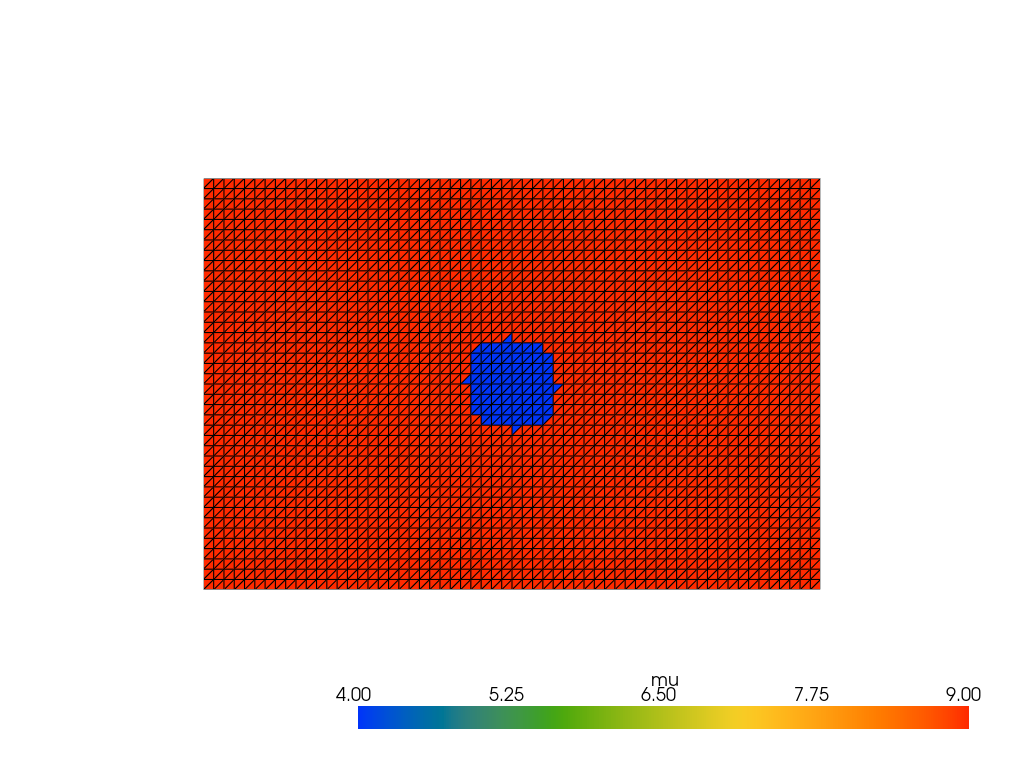

In [14]:
# Con ChatGPT :

# Extraer datos de la malla en formato VTK desde el dominio
cells, types, points = plot.vtk_mesh(domain)

# Crear un visualizador de PyVista en modo notebook
plotter = pv.Plotter(shape=(1, 1), notebook=True)

# Construir un grid no estructurado con la malla obtenida
mesh = pv.UnstructuredGrid(cells, types, points)

# Asignar los valores del campo escalar 'mu' a las celdas del grid
mesh.cell_data["mu"] = mu.x.array
mesh.set_active_scalars("mu")  # Definir qué campo escalar se usará por defecto

# Seleccionar la primera celda del subplot (única en este caso)
plotter.subplot(0, 0)

# Añadir la malla al gráfico con opciones de visualización
plotter.add_mesh(mesh, scalars="mu", cmap="rainbow", show_edges=True,
                 show_scalar_bar=True, lighting=False)

# Configurar vista en el plano XY
plotter.view_xy()

# Mostrar el resultado interactivo
plotter.show()

### **P2**

> **a.** Cree una función ``solve(domain, mu, displacement, V)``, que reciba el mallado rectangular ``domain``, su módulo de elasticidad transversal ``mu``, un campo de desplazamiento ``displacement`` (del tipo ``fem.function.Function`` sobre ``V``) y el espacio de elementos finitos ``V`` del problema de elasticidad lineal, y entregue la solución ``uh`` del sistema.   

In [15]:
def solve(domain:dolfinx.mesh.Mesh,
          mu:dolfinx.fem.function.Function,
          displacement:dolfinx.fem.function.Function,
          Vspace:dolfinx.fem.function.FunctionSpace) -> dolfinx.fem.function.Function:

  #Funcion que carcteriza el borde 1
  on_boundary1 = lambda x: np.isclose(x[1], 40) # devuelve True si x[1] es aproximadamente igual a 40
  boundary_dofs1 = fem.locate_dofs_geometrical(Vspace, on_boundary1)
  bc1 = fem.dirichletbc(displacement, boundary_dofs1)

  #Funcion que caracteriza el borde 2
  on_boundary2 = lambda x: np.isclose(x[1], 0)
  boundary_dofs2 = fem.locate_dofs_geometrical(Vspace, on_boundary2)
  bc2 = fem.dirichletbc(ScalarType((0,0)), boundary_dofs2, Vspace)


  u = ufl.TrialFunction(Vspace)
  v = ufl.TestFunction(Vspace)

  def e(u):
    grad = ufl.grad(u)
    return (1/2)*(grad + grad.T)

  a = (mu * (ufl.inner(e(u), e(v)) + ufl.nabla_div(u) * ufl.nabla_div(v))) * ufl.dx # forma bilineal

  L_fun = fem.Function(Vspace)
  L_fun.interpolate(lambda x: (x[0]*0,x[1]*0))
  L = ufl.dot(L_fun, v)*ufl.dx


  #Resuelve el problema lineal
  problem = fem.petsc.LinearProblem(a, L, bcs = [bc1,bc2])
  uh = problem.solve() # resolver sistema lineal

  return uh

In [ ]:
'''
YA FUE DEFINIDO ANTES en parte anterior, si se vuelve a definir existe un error:

# Definicion del dominio y espacios
Lx, Ly =  60, 40
nx, ny = 60, 40
domain = rectangular_domain(nx,ny,Lx,Ly)

#Parametro mu con inclusion circular
V_cell = fem.functionspace(domain, ("DG", 0))


def inclusion_circle(x):
    return (x[0] - Lx/2)**2 + (x[1] - Ly/2)**2 - r**2

inclusions = np.array([(inclusion_circle, 4)])

mu1 = 9
mu = create_mu(inclusions, mu1, V_cell)
'''

'\nYA FUE DEFINIDO ANTES en parte anterior, si se vuelve a definir existe un error:\n\n# Definicion del dominio y espacios\nLx, Ly =  60, 40\nnx, ny = 60, 40\ndomain = rectangular_domain(nx,ny,Lx,Ly)\n\n#Parametro mu con inclusion circular\nV_cell = fem.functionspace(domain, ("DG", 0))\n\n\ndef inclusion_circle(x):\n    return (x[0] - Lx/2)**2 + (x[1] - Ly/2)**2 - r**2\n\ninclusions = np.array([(inclusion_circle, 4)])\n\nmu1 = 9\nmu = create_mu(inclusions, mu1, V_cell)\n'

In [16]:
# Definicion del dominio y espacios
V = fem.functionspace(domain, ("Lagrange", 1, (2,)))

#Desplazamiento impuesto en el borde
displacement_fun = fem.Function(V)
displacement_fun.interpolate(lambda x: (x[0]*0,x[1]*0-0.8))

In [17]:
#Resolver el problema
uh = solve(domain, mu, displacement_fun, V)

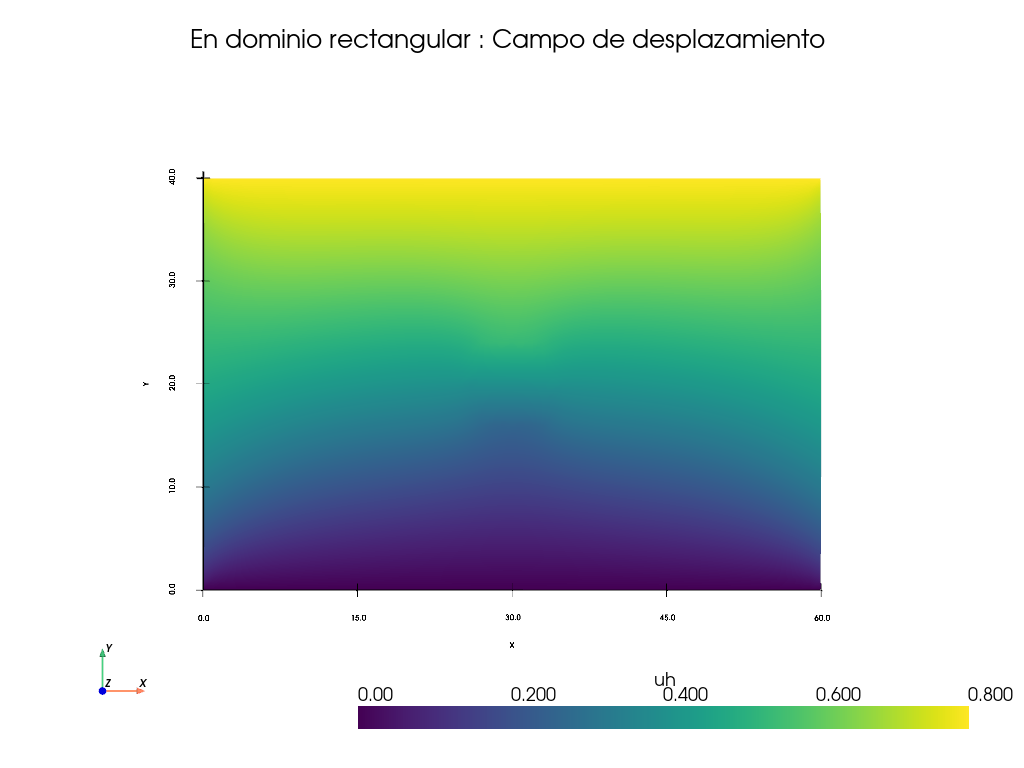

In [18]:
# Con ChatGPT
#Visualizacion
pyvista_cells, cell_types, x = plot.vtk_mesh(domain)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

# genera grid de pyvista
grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
uh_arr = uh.x.array.reshape(x.shape[0],uh.function_space.dofmap.index_map_bs)
uh_arr = np.concatenate([uh_arr,np.zeros(uh_arr.shape[0])[...,None]], axis = 1)
grid.point_data["uh"] = uh_arr
grid.set_active_scalars("uh")

subplotter.subplot(0,0)
warped = grid.warp_by_scalar("uh", factor = 1)

#Agrega mallado
subplotter.add_mesh(warped, cmap = "viridis", lighting = False,  scalars = "uh", show_scalar_bar = True)
subplotter.view_xy()

# Add titles and labels
subplotter.add_title("En dominio rectangular : Campo de desplazamiento ", font_size=11)
subplotter.show_grid(ztitle='Z', xtitle='X', ytitle='Y', font_size=6)
subplotter.show_axes()
subplotter.show()

> **b.** Resuelva el problema de elasticidad lineal para los datos del modelo, graficando la magnitud del campo de desplazamiento $u=(u^x;u^y)$ con su glifo respectivo, deformación lateral ($\partial_xu^x$), deformación axial ($\partial_yu^y$), deformación de corte lateral ($\partial_y u^x$) y deformación de corte axial ($\partial_x u^y$). Justifique cuál de las componentes de deformación anteriores permite identificar de mejor manera un objeto anómalo en tejido biológico.

**Hint:** Puede utilizar ``ufl.grad``, que calcula el gradiente considerando $(\nabla w)_{ij}=\partial_jw^i$.

**Hint:** Para no sobrecargar con flechas, puede muestrear del mallado usando los siguientes comandos:

```
  xx, yy = np.meshgrid(np.linspace(0, Lx, nx_new), np.linspace(0, Ly, ny_new))
  points = np.column_stack((xx.flatten(), yy.flatten(), np.zeros(nx_new*ny_new)))
  sample_grid = pv.StructuredGrid(xx, yy, np.zeros_like(xx))

  resampled_grid = sample_grid.sample(pass_point_data = True, target = grid)
```

In [19]:
def ufl_to_femFunction(ufl_form, V_space:dolfinx.fem.function.FunctionSpace) -> dolfinx.fem.function.Function:

  #Inicialicion de funcion
  fem_fun = fem.Function(V_space)

  #Expresion ufl
  expr = fem.Expression(ufl_form, V_space.element.interpolation_points())

  #Interpolacion
  fem_fun.interpolate(expr)

  return fem_fun

**Hint:** Puede utilizar ``ufl.grad``, que calcula el gradiente considerando $(\nabla w)_{ij}=\partial_jw^i$.

In [20]:
pyvista_cells, cell_types, x = plot.vtk_mesh(domain)
u_grad = ufl.grad(uh)

V_scal = fem.functionspace(domain, ("Lagrange", 1))
# Donde (0,1) := (x,y)

#Deformacion lateral
u_xx = ufl_to_femFunction(u_grad[0,0], V_scal)

#Deformacion axial
u_yy = ufl_to_femFunction(u_grad[1,1], V_scal)

# Deformacion de corte lateral \partial_y u^x

u_yx = ufl_to_femFunction(u_grad[1,0], V_scal)

# Deformacion de corte axial \partial_x u^y
u_xy = ufl_to_femFunction(u_grad[0,1], V_scal)


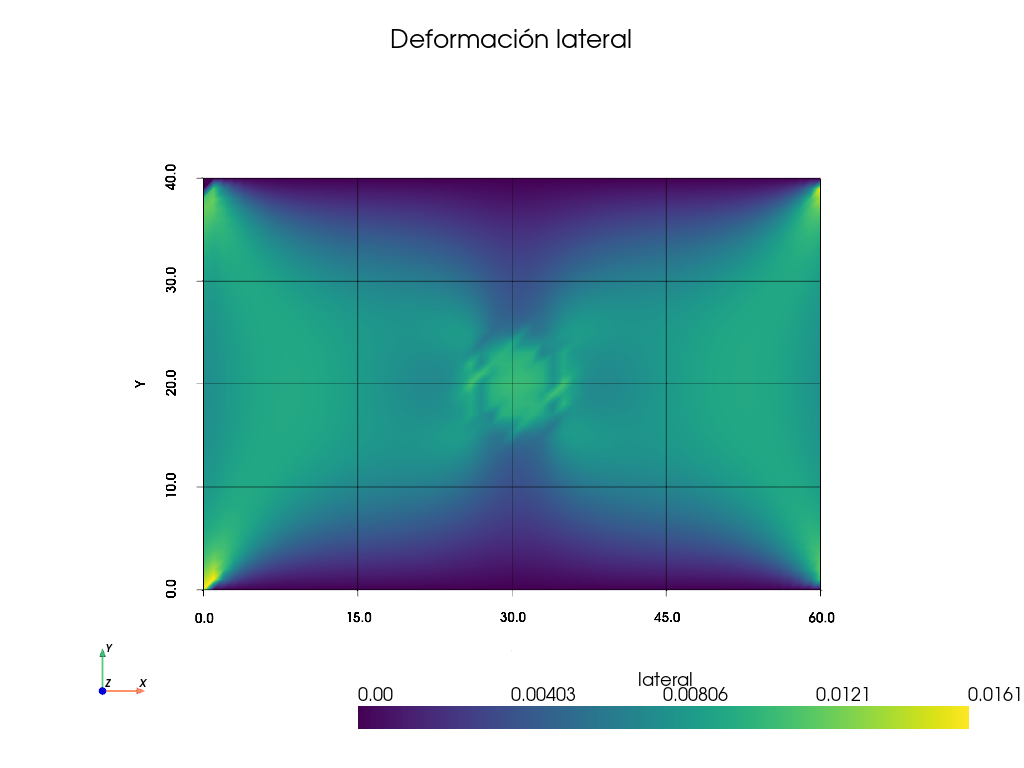

In [21]:
# deformación lateral u_xx
grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["lateral"] = u_xx.x.array
grid.set_active_scalars("lateral")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación lateral", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

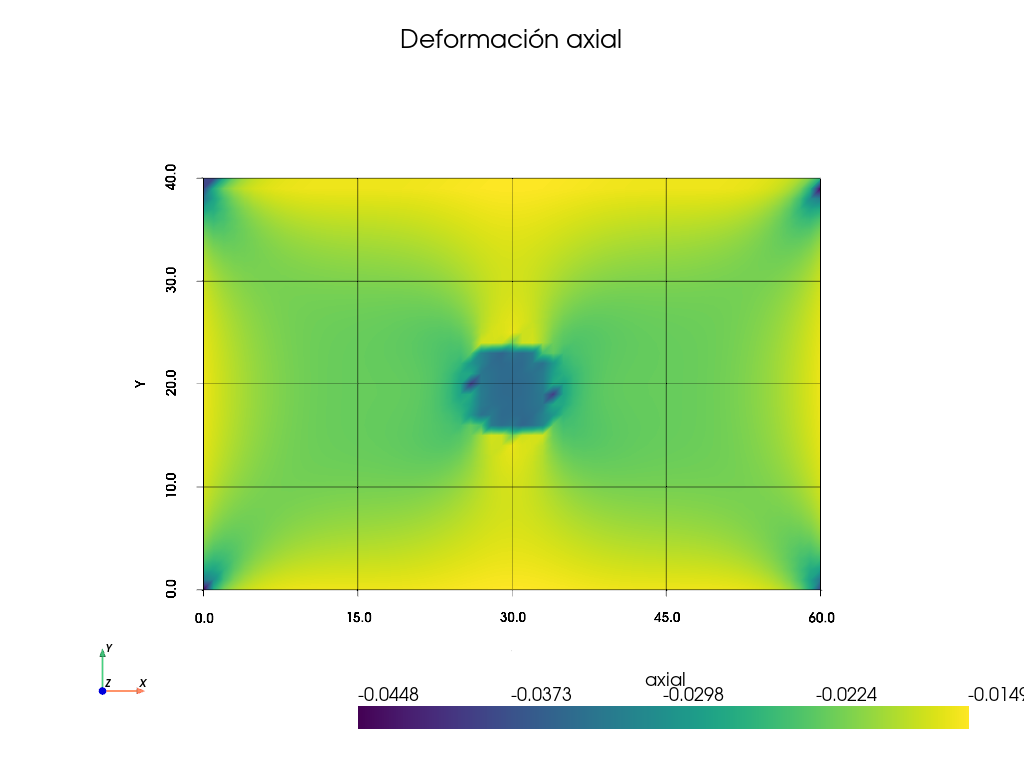

In [22]:
# deformación axial u_yy
grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["axial"] = u_yy.x.array
grid.set_active_scalars("axial")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación axial", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

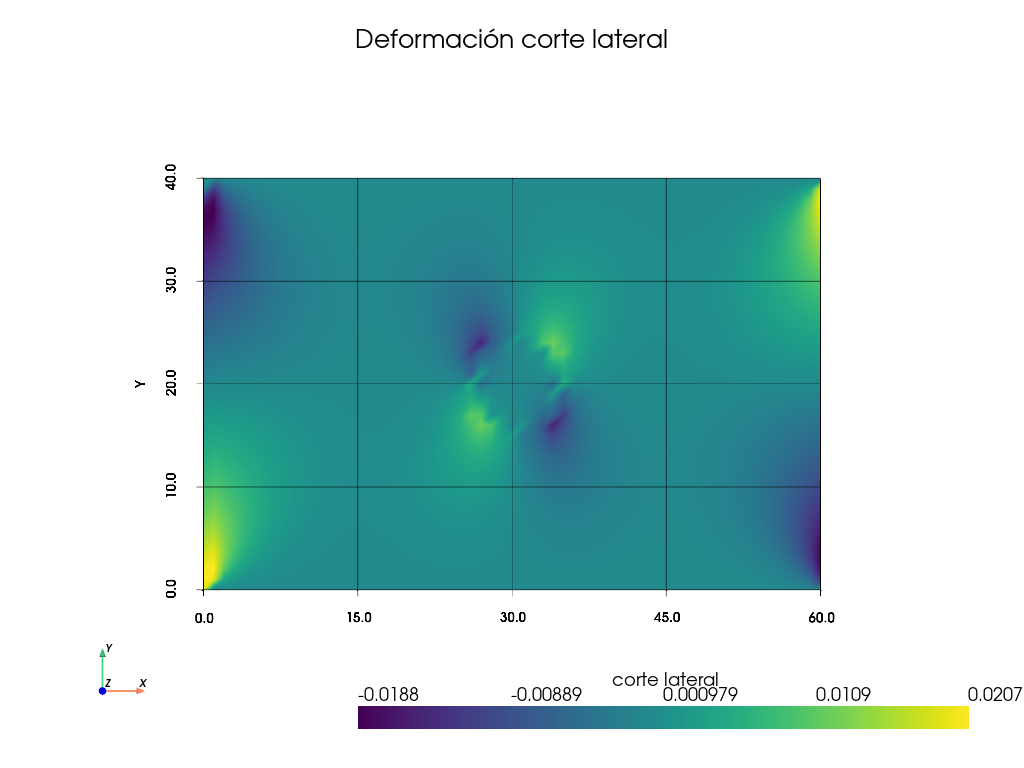

In [ ]:
# Deformacion de corte lateral u_yx

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["corte lateral"] = u_yx.x.array
grid.set_active_scalars("corte lateral")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación corte lateral", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

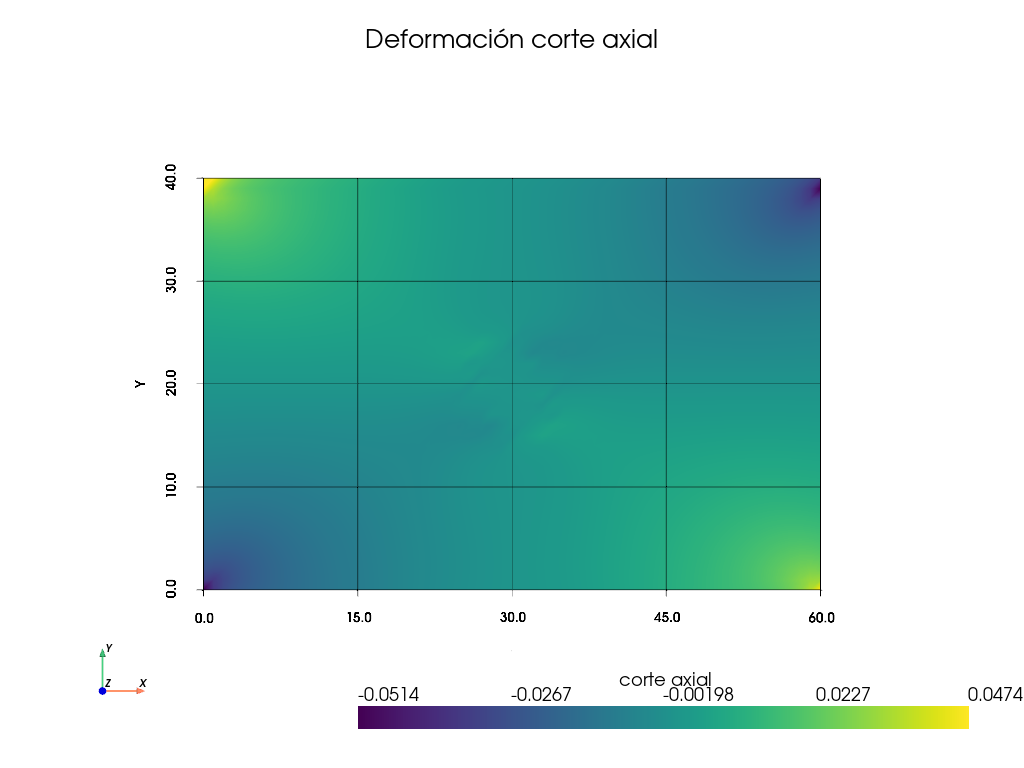

In [ ]:
# Deformacion de corte axial u_xy

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["corte axial"] = u_xy.x.array
grid.set_active_scalars("corte axial")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación corte axial", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

Notamos que las componentes de deformación Axial, Corte lateral y Lateral(en orden decreciente) permiten identificar vizualmente de mejor manera un objeto anómalo en tejido biológico.

La deformación Corte axial no es identificable rapidamente.

# **Parte II**

### **P1**
> **a.** Grafique las curvas de $\mu$ y de magnitud de deformación $\sqrt{\nabla u : \nabla u}$ para el modelo de la Parte I en el eje de corte $\{y=20[mm]\}$.




In [23]:
V_cell = fem.functionspace(domain, ("Lagrange", 1)) #Definir el espacio de funciones adecuado
deform = ufl.sqrt(ufl.inner(u_grad, u_grad)) #generar el tensor asocia
deform = ufl_to_femFunction(deform, V_cell) #convertir

In [24]:
tol = 1e-3  # tolerancia para no llegar a los bordes del dominio

x = np.linspace(0 + tol, 60 - tol, 100)
points = np.zeros((3, 100))
points[0] = x
points[1] = 20
mu_values = []
df_values = []

bb_tree = dolfinx.geometry.bb_tree(domain, domain.topology.dim)

In [25]:
cells = []
points_on_proc = []

# celdas cuyo bounding-box choque con el conjunto de puntos
cell_candidates = dolfinx.geometry.compute_collisions_points(bb_tree, points.T)
# tomar para cada punto una de dichas celdas
colliding_cells = dolfinx.geometry.compute_colliding_cells(domain, cell_candidates, points.T)

for i, point in enumerate(points.T):
  if len(colliding_cells.links(i)) > 0:
    points_on_proc.append(point)
    cells.append(colliding_cells.links(i)[0])

In [26]:
points_on_proc = np.array(points_on_proc, dtype = np.float64)

mu_values = mu.eval(points_on_proc, cells)
df_values = deform.eval(points_on_proc, cells)

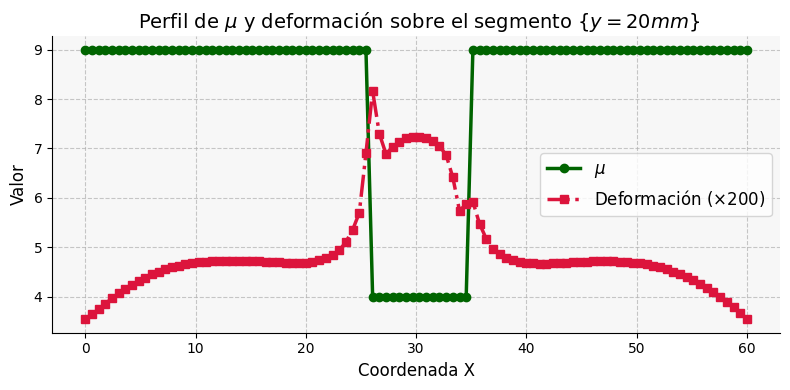

In [27]:
# ChatGPT

fig, ax = plt.subplots(figsize=(8, 4))

# Cambiar colores y estilos de línea
ax.plot(points_on_proc[:, 0], mu_values, color="darkgreen", linestyle="-", linewidth=2.5, marker="o", label=r"$\mu$")
ax.plot(points_on_proc[:, 0], 200* df_values, color="crimson", linestyle="dashdot", linewidth=2.5, marker="s", label=r"Deformación ($\times 200$)")

# Estilo de cuadrícula y ejes
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_facecolor("#f7f7f7")

# Etiquetas y título
ax.set_xlabel("Coordenada X", fontsize=12)
ax.set_ylabel("Valor", fontsize=12)
ax.set_title(r" Perfil de $\mu$ y deformación sobre el segmento $\{y=20mm\}$", fontsize=14)

# Leyenda
ax.legend(loc="best", fontsize=12)

# Opcional: quitar borde superior y derecho para estilo limpio
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


> **b.** Elija una nueva configuración de parámetros para el problema de elastografía de la Parte I. Fijando $\mu$ en el medio de referencia, varíe su valor en la inclusión, calculando la magnitud de deformación $\sqrt{\nabla u : \nabla u}$ en su centro. ¿Cómo se relaciona $\mu$ con la rigidez del material?

**Indicación:** Grafique sus resultados en una curva $\mu$ vs. $\sqrt{\nabla u : \nabla u}$.

In [28]:
mu_array = np.linspace(0.5, 10, num=20)
mu_array

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [29]:
# 20 valores para mu :
mu_array = np.linspace(0.5, 10, num=20)

deform_array = np.array([])

In [30]:
# Se crea una función displacement_fun en el espacio de funciones V.
displacement_fun = fem.Function(V)
# Se interpola una deformación inicial constante: u(x,y)=(0,−0.8. Es decir, un desplazamiento vertical hacia abajo constante
displacement_fun.interpolate(lambda x: (x[0]*0,x[1]*0-0.8))

# Crea un espacio discontinuo de grado 0, es decir, una función constante por celda del mallado (DG = Discontinuous Galerkin).
# Este espacio se usará para definir el parámetro mu
V_cell = fem.functionspace(domain, ("DG", 0))

deform_array = []

for i in mu_array:
  # crea funcion mu con soporte dentro de un círculo centrado en (Lx/2,Ly/2)
  # i es la magnitud del parametro mu
  mu = create_mu(np.array([(lambda x: (x[0]-Lx/2)**2 + (x[1]-Ly/2)**2 - r**2, i)]), 9, V_cell)
  # Se resuelve el problema de elementos finitos con el dominio, la fuente mu el desplazamiento inicial, y el espacio de funciones V
  uh = solve(domain, mu, displacement_fun, V)

  u_grad = ufl.grad(uh) # Calcula el gradiente del desplazamiento.
  Vc = fem.functionspace(domain, ("Lagrange", 1))
  deform = ufl.sqrt(ufl.inner(u_grad, u_grad))
  deform = ufl_to_femFunction(deform, Vc) # Se convierte a una función FEM interpolada en un espacio Lagrange continuo (grado 1).

  tol = 1e-3
  x = np.linspace(0 + tol, 60 - tol, 100)
  points = np.zeros((3, 100))
  points[0] = x
  points[1] = 20
  mu_values = []
  df_values = []
  bb_tree = dolfinx.geometry.bb_tree(domain, domain.topology.dim)
  cells = []
  points_on_proc = []

  # buscar celdas cuyo bounding-box tope con el conjunto de puntos
  cell_candidates = dolfinx.geometry.compute_collisions_points(bb_tree, points.T)
  # elegir por cada punto una de dichas celdas
  colliding_cells = dolfinx.geometry.compute_colliding_cells(domain, cell_candidates, points.T)
  for n, point in enumerate(points.T):
    if len(colliding_cells.links(n)) > 0:
      points_on_proc.append(point)
      cells.append(colliding_cells.links(n)[0])
  points_on_proc = np.array(points_on_proc, dtype = np.float64)

  mu_values = mu.eval(points_on_proc, cells)
  df_values = deform.eval(points_on_proc, cells) # evaluar deformación en conjunto de puntos

  deform_array = np.append(deform_array, df_values[50])

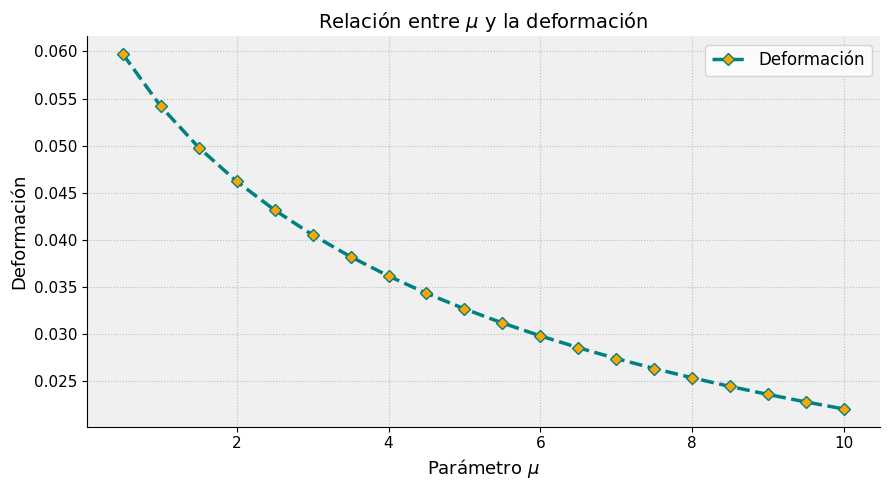

In [31]:
# ChatGPT

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 5))

# Gráfico con estilo diferente
ax.plot(mu_array, deform_array, color="teal", linestyle="--", linewidth=2.5,
        marker="D", markersize=6, markerfacecolor="orange", label=r"Deformación")

# Estilo de fondo y cuadrícula
ax.set_facecolor("#f0f0f0")
ax.grid(True, linestyle=":", linewidth=0.8, alpha=0.8)

# Etiquetas y título con tamaño personalizado
ax.set_xlabel(r"Parámetro $\mu$", fontsize=13)
ax.set_ylabel("Deformación", fontsize=13)
ax.set_title(r"Relación entre $\mu$ y la deformación", fontsize=14)

# Personalización de los ejes
ax.tick_params(axis='both', labelsize=11)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Leyenda
ax.legend(loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()

### **P2**

> **a.** Encuentre las soluciones de desplazamiento y componentes de deformación para la configuración de la Parte I, agregando ahora una inclusión cuadrada ($\mu=27[kPa]$) dada por la inecuación $|x-30|+|y-20| - 10\leq 0$ que absorbe a la inclusión circular ($\mu=4[kPa]$) y otra inclusión circular de radio $5[mm]$, $\mu = 16[kPa]$ y con centro de su elección.

In [ ]:
'''
#En parte I se utiliza : uh = solve(domain, mu, displacement_fun, V)
'''

'\n#En parte I se utiliza : uh = solve(domain, mu, displacement_fun, V)\n'

In [32]:
# Se tuvo que crear otro create_mu porque el anterior no guardaba las inclusiones posteriores, solo la primera.

def create_mu_modificada(inclusions:np.ndarray, background:float, Vspace:dolfinx.fem.function.FunctionSpace) -> dolfinx.fem.function.Function:
    """
    Asigna valores de mu en el dominio con exclusividad según orden de inclusiones.

    inclusions : arreglo de tuplas (f, val) donde f(x) <= 0 define la inclusión y val es el valor de mu en esa región.
    background : valor de mu en el medio base
    Vspace : espacio funcional para la función mu
    """
    mu_fun = fem.Function(Vspace)
    mu_fun.x.array[:] = background  # Asignar valor de fondo

    # Arreglo booleano que indica si ya se asignó un valor distinto del fondo
    assigned = np.zeros_like(mu_fun.x.array, dtype=bool)

    for f, val in inclusions:
        # Condición para puntos dentro de la inclusión
        condicion = lambda x, f=f: f(x) <= 0
        idx = dolfinx.mesh.locate_entities(domain, domain.topology.dim, condicion)

        # Filtrar índices donde no se haya asignado un valor distinto del fondo (exclusividad)
        idx_no_asignados = idx[~assigned[idx]]

        # Asignar valor solo en esos índices
        mu_fun.x.array[idx_no_asignados] = val

        # Marcar esos índices como asignados
        assigned[idx_no_asignados] = True

    return mu_fun


In [33]:
r = 5  # radio de segunda inclusión circular
center = (50, 10) # centro de segunda inclusion circular

# Inclusión cuadrada tipo diamante
f_square = lambda x: abs(x[0]-30) + abs(x[1]-20) - 10

# Inclusión circular (centro arbitrario, ej. (50,10))

f_circle = lambda x: np.sqrt((x[0]-center[0])**2 + (x[1]-center[1])**2) - r

new_mu = create_mu_modificada(np.array([
    (f_circle, 16),
    (f_square , 27),
]), 9, V_cell)
uh_new = solve(domain, new_mu, displacement_fun, V)

u_grad = ufl.grad(uh_new)
V_scal = fem.functionspace(domain, ("Lagrange", 1))

u_xx = ufl_to_femFunction(u_grad[0,0], V_scal) # Deformacion lateral
u_yy = ufl_to_femFunction(u_grad[1,1], V_scal) # Deformacion axial
u_xy = ufl_to_femFunction(u_grad[0,1], V_scal) # Deformacion de corte axial \partial_x u^y
u_yx = ufl_to_femFunction(u_grad[1,0], V_scal) # Deformacion de corte lateral \partial_y u^x

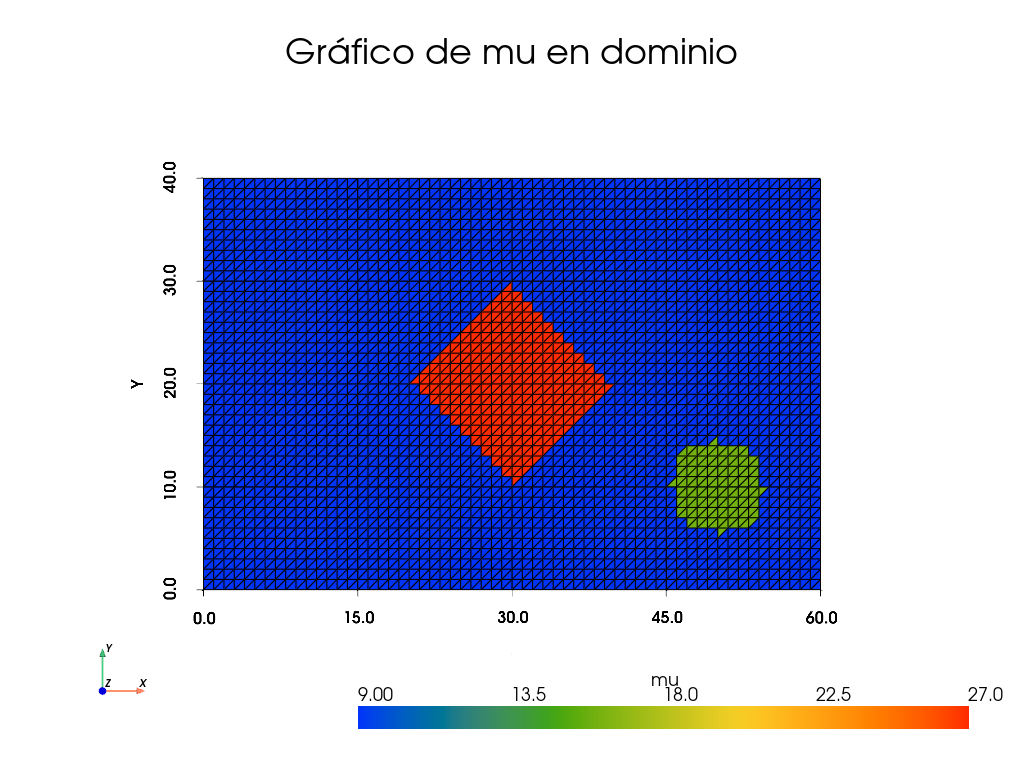

In [36]:
pyvista_cells, cell_types, x = plot.vtk_mesh(domain) # obtener componentes de malla vtk
subplotter = pv.Plotter(shape = (1,1), notebook = True) # inicializar graficador

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x) # generar grid de pyvista
grid.cell_data["mu"] = new_mu.x.array
grid.set_active_scalars("mu")

subplotter.subplot(0,0) # segundo subplot
subplotter.add_mesh(grid, cmap = "rainbow", lighting = False,  scalars = "mu", show_edges=True, show_scalar_bar = True) # mismo mallado
subplotter.view_xy() # visualizar solo plano xy

# Add titles and labels
subplotter.add_title("Gráfico de mu en dominio", font_size=14)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')

subplotter.show_grid(**labels, font_size=12)
subplotter.show_axes()

subplotter.show() # mostrar figura

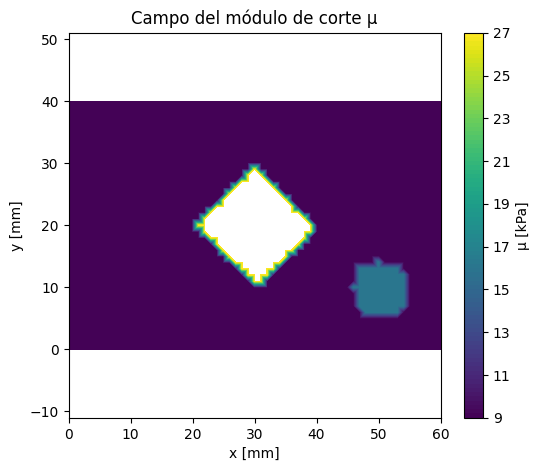

In [39]:
# Con matplotlib.pyplot

#  mu_2.x.array no está definido por nodos como espera matplotlib.tricontourf,
# sino por celdas (porque se usa un espacio DG0). Por esto  se Interpolar a espacio continuo

# Espacio continuo tipo Lagrange (por nodo)
V_cont = fem.functionspace(domain, ("Lagrange", 1))
mu_interp = fem.Function(V_cont)
mu_interp.interpolate(new_mu)

# Obtener coordenadas nodales y valores de mu interpolados
coords = domain.geometry.x
mu_vals = mu_interp.x.array

plt.figure(figsize=(6,5))
plt.tricontourf(coords[:, 0], coords[:, 1], mu_vals, 100, cmap="viridis")
plt.colorbar(label="μ [kPa]")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.title("Campo del módulo de corte μ")
plt.axis("equal")
plt.show()

Recordemos que :


```
u_xx = ufl_to_femFunction(u_grad[0,0], V_scal) # Deformacion lateral
u_yy = ufl_to_femFunction(u_grad[1,1], V_scal) # Deformacion axial
u_xy = ufl_to_femFunction(u_grad[0,1], V_scal) # Deformacion de corte axial \partial_x u^y
u_yx = ufl_to_femFunction(u_grad[1,0], V_scal) # Deformacion de corte lateral \partial_y u^x
```



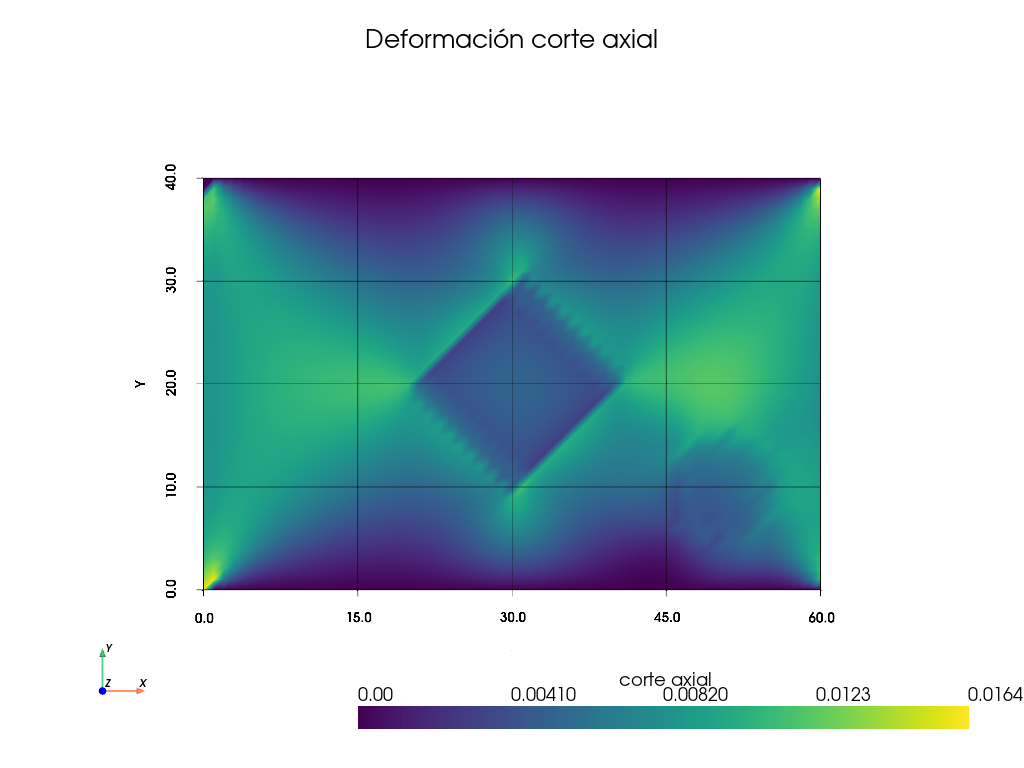

In [ ]:
# Deformacion lateral u_xx

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["corte axial"] = u_xx.x.array
grid.set_active_scalars("corte axial")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación corte lateral", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

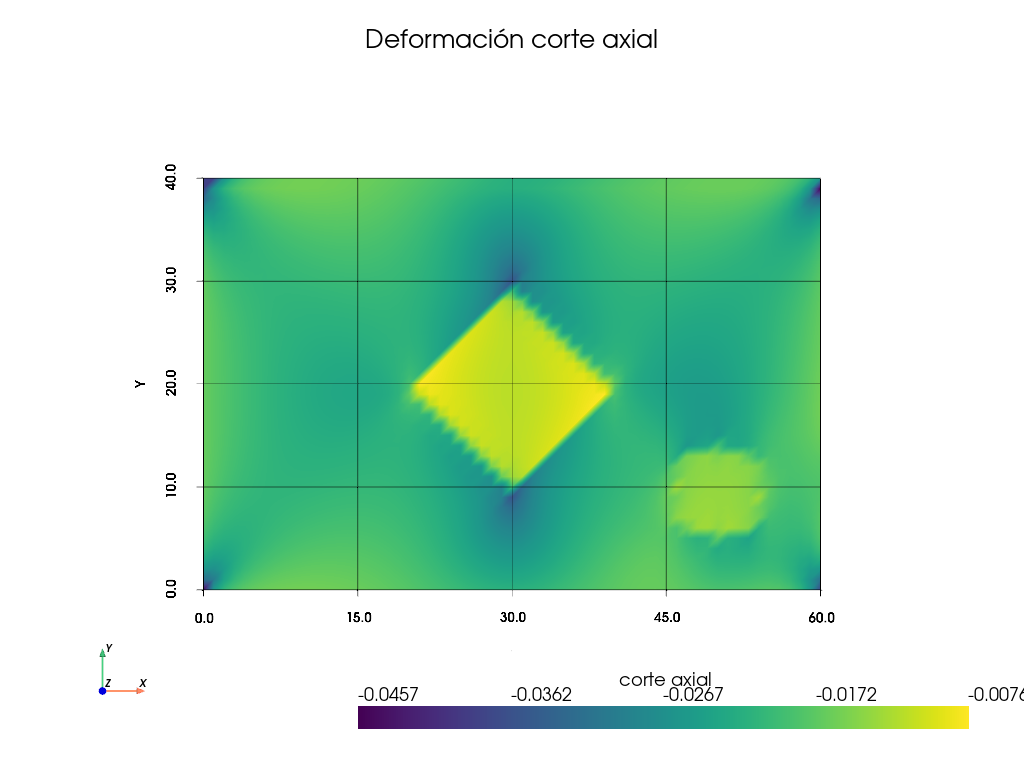

In [ ]:
# Deformacion axial u_yy

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["corte axial"] = u_yy.x.array
grid.set_active_scalars("corte axial")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación corte axial", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

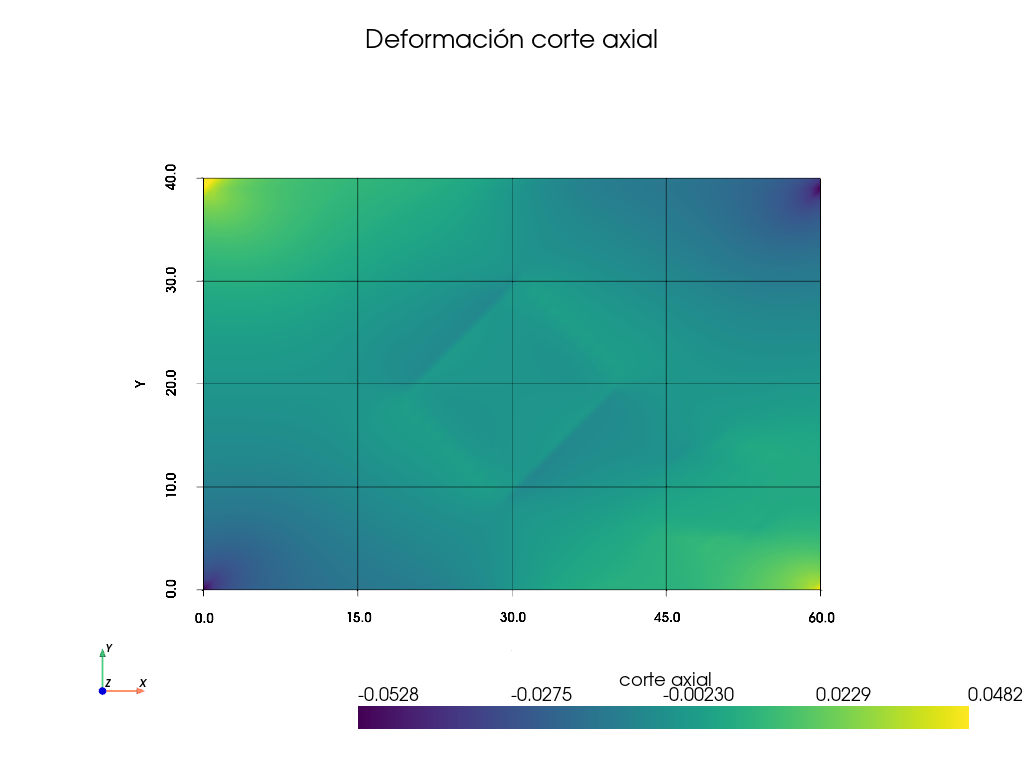

In [ ]:
# Deformacion corte axial u_yy

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["corte axial"] = u_xy.x.array
grid.set_active_scalars("corte axial")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación corte axial", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

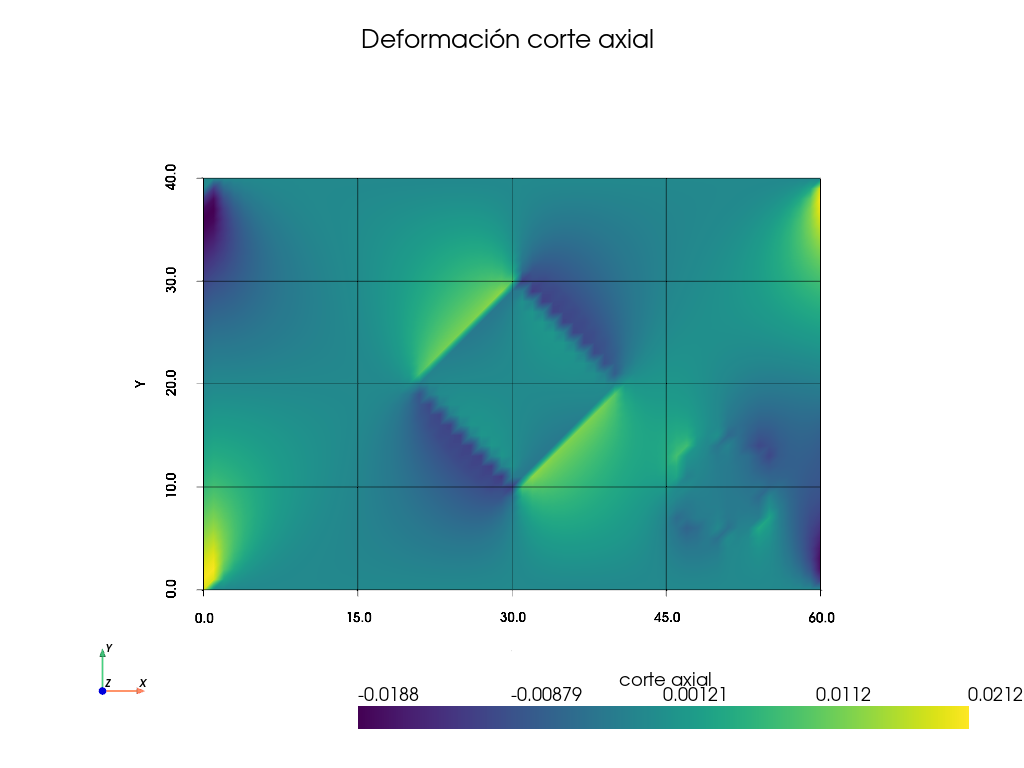

In [ ]:
# Deformacion corte lateral u_yx

grid = pv.UnstructuredGrid(pyvista_cells, cell_types, x)
subplotter = pv.Plotter(shape = (1,1), notebook = True)

grid.point_data["corte axial"] = u_yx.x.array
grid.set_active_scalars("corte axial")

subplotter.subplot(0,0)
subplotter.add_mesh(grid, cmap = "viridis", lighting = False, show_scalar_bar=True)

subplotter.view_xy()

subplotter.add_title(r"Deformación corte lateral ", font_size=10)
labels = dict(ztitle='Z', xtitle='X', ytitle='Y')
subplotter.show_grid(**labels, font_size=10)
subplotter.show_axes()

subplotter.show()

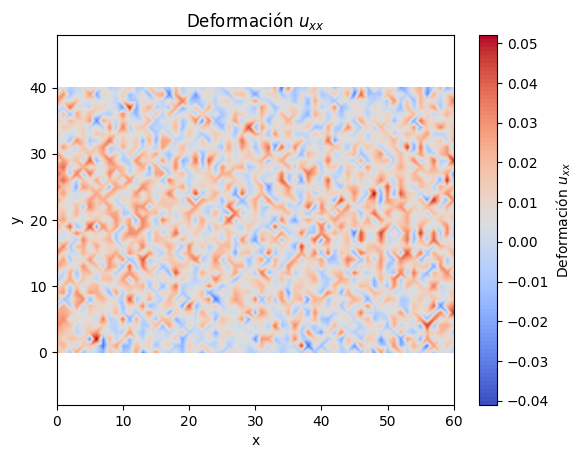

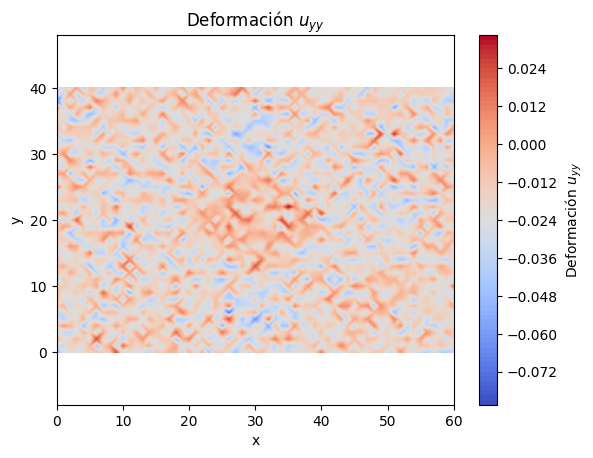

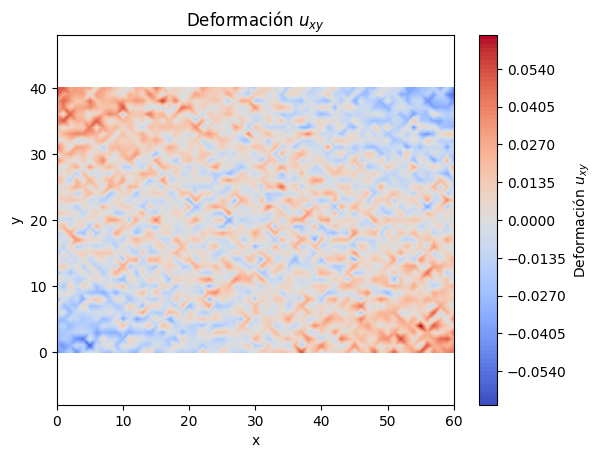

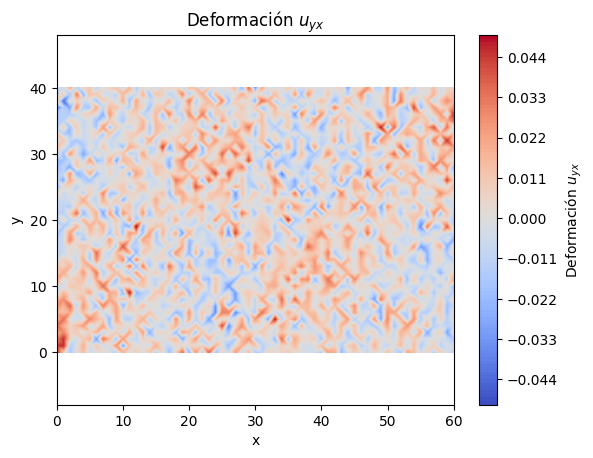

In [40]:
# Con matplotlib.pyplot

def plot_scalar_field(V, u_femfunction, title):
    coords = V.mesh.geometry.x
    values = u_femfunction.x.array
    plt.tricontourf(coords[:, 0], coords[:, 1], values, 100, cmap="coolwarm")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar(label=title)
    plt.axis("equal")
    plt.show()

plot_scalar_field(V_scal, u_xx, r"Deformación $u_{xx}$")
plot_scalar_field(V_scal, u_yy, r"Deformación $u_{yy}$")
plot_scalar_field(V_scal, u_xy, "Deformación $u_{xy}$")
plot_scalar_field(V_scal, u_yx, r"Deformación $u_{yx}$")


> **b.** Justifique si es posible identificar inclusiones si hay ruido en las observaciones de desplazamiento. Grafique la solución del sistema y las componentes de deformación luego de agregar a $u$ una perturbación gaussiana $\mathcal{N}(0,10^{-k})$, $k=2,3$. ¿En qué dirección del campo se espera que predomine el ruido? Explique.

In [34]:
N = uh_new.x.array.shape[0] # Da la cantidad de nodos o grados de libertad del array
G1 = np.random.normal(0,10**(-2),N) # Gaussiana

h = dolfinx.fem.Function(V)
v = dolfinx.fem.Function(V)

v.x.array[:] = G1 # se asignan los valores a v de G1

h.x.array[:] = uh_new.x.array + v.x.array # a uh_new se le agrega el ruido

In [37]:
u_grad = ufl.grad(h)
V_scal = fem.functionspace(domain, ("Lagrange", 1))
# Deformacion axial
u_yy = ufl_to_femFunction(u_grad[1,1], V_scal)
# Deformacion lateral
u_xx = ufl_to_femFunction(u_grad[0,0], V_scal)
# Deformacion de corte axial
u_xy = ufl_to_femFunction(u_grad[0,1], V_scal)
# Deformacion de corte lateral
u_yx = ufl_to_femFunction(u_grad[1,0], V_scal)

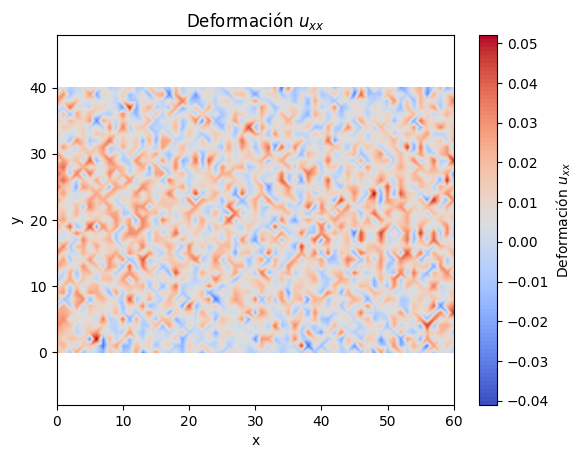

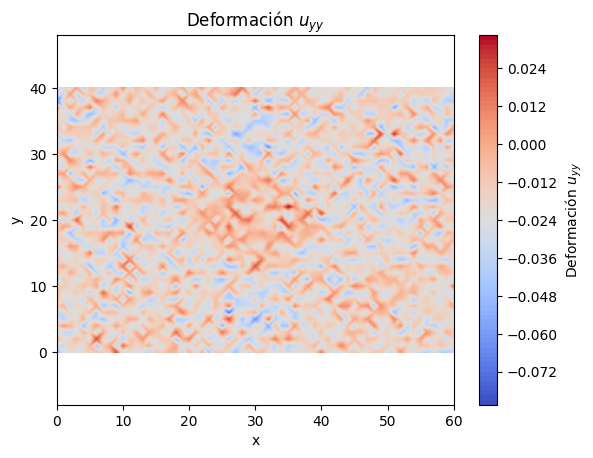

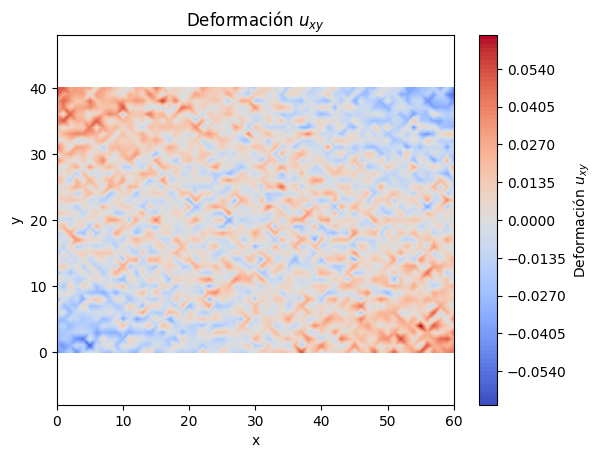

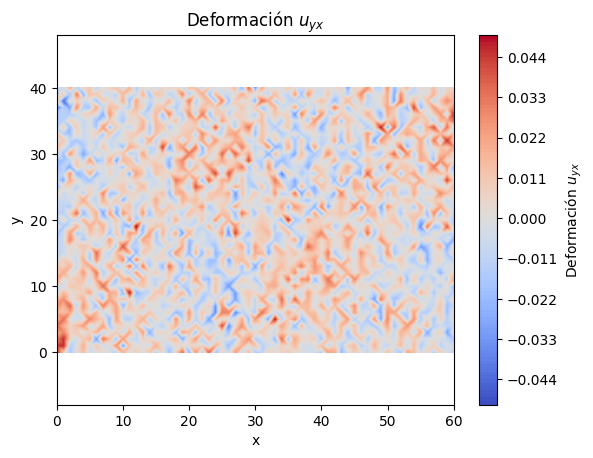

In [41]:
# def plot_scalar_field(V, u_femfunction, title) fue definido justo arriba de la parte b.

plot_scalar_field(V_scal, u_xx, r"Deformación $u_{xx}$")
plot_scalar_field(V_scal, u_yy, r"Deformación $u_{yy}$")
plot_scalar_field(V_scal, u_xy, "Deformación $u_{xy}$")
plot_scalar_field(V_scal, u_yx, r"Deformación $u_{yx}$")

In [42]:
N = uh_new.x.array.shape[0]
G1 = np.random.normal(0,10**(-3),N)

h = dolfinx.fem.Function(V)
v = dolfinx.fem.Function(V)

v.x.array[:] = G1

h.x.array[:] = uh_new.x.array + v.x.array

In [43]:
u_grad = ufl.grad(h)
V_scal = fem.functionspace(domain, ("Lagrange", 1))
u_yy = ufl_to_femFunction(u_grad[1,1], V_scal)
u_xx = ufl_to_femFunction(u_grad[0,0], V_scal) # Deformacion lateral
u_xy = ufl_to_femFunction(u_grad[0,1], V_scal) # Deformacion de corte axial
u_yx = ufl_to_femFunction(u_grad[1,0], V_scal) # Deformacion de corte lateral

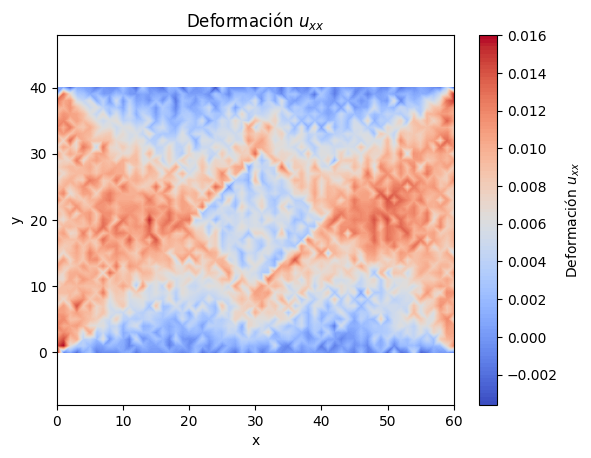

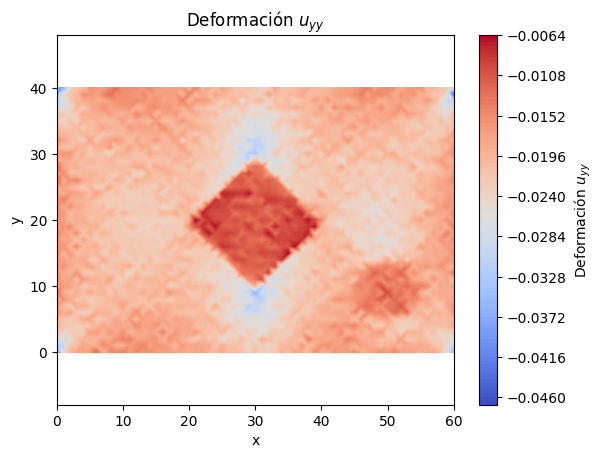

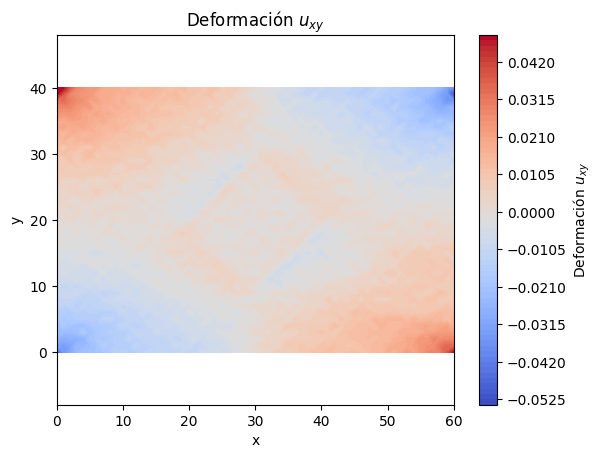

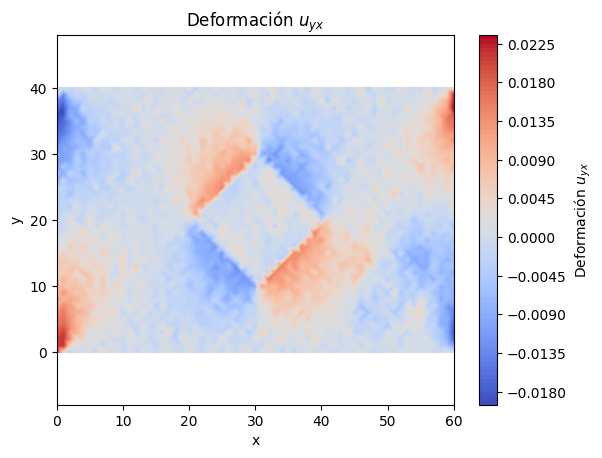

In [44]:
plot_scalar_field(V_scal, u_xx, r"Deformación $u_{xx}$")
plot_scalar_field(V_scal, u_yy, r"Deformación $u_{yy}$")
plot_scalar_field(V_scal, u_xy, "Deformación $u_{xy}$")
plot_scalar_field(V_scal, u_yx, r"Deformación $u_{yx}$")

Para el caso $k = 2$, se observa que detectar las inclusiones es más complejo, en el caso de $k = 3$ se puede apreciar con menor dificultad, lo cual es intuitivo al notar que a menor rudio de la información mayor facilidad para recuperar información.


Si la carga se aplica verticalmente, se espera que las componentes '$y$' de '$u$' tenga mayor variación, y posiblemente el ruido debe afectar más.
